In [1]:
import numpy as np
import scipy.io as sio
import os

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
data = sio.loadmat('./CFDData/data_CFD.mat')

u_cfd = data['U'][:,:,-1]
v_cfd = data['V'][:,:,-1]
p_cfd = data['P'][:,:,-1]
x_cfd = data['x'][0]
y_cfd = data['y'][0]

print(u_cfd.shape)
print(x_cfd.shape)

u_cfdavg = u_cfd[:,:].mean(axis = 1)
v_cfdavg = v_cfd[:,:].mean(axis = 1)
p_cfdavg = p_cfd[:,:].mean(axis = 1)

(750, 50)
(750,)


In [3]:
datashape = u_cfd.shape[0]
onex = int(datashape / 50)

In [4]:
base = sio.loadmat('./Base Model/data_PINN.mat')

u_base = base['U']
v_base = base['V']
p_base = base['P']
x_base = base['x'][0]
y_base = base['y'][0]

print(u_base.shape)
print(x_base.shape)

u_baseavg = u_base[:,:].mean(axis = 1)
v_baseavg = v_base[:,:].mean(axis = 1)
p_baseavg = p_base[:,:].mean(axis = 1)

(750, 50)
(750,)


In [5]:
param_list = []

i = 0
for folder in os.scandir('./'):
    i += 1
    if os.path.isdir(folder.name) and i > 4:
        param_list.append(folder.name)

print(param_list)

model_list = []
location_list = []

for current_param in param_list:
    for folder in os.scandir('./' + current_param):
        model_list.append(current_param + ': ' + folder.name)
        location_list.append(current_param + '/' + folder.name)

['Epochs', 'Function', 'Grid Boundary Points', 'Layers', 'Learning Rate', 'Outlet BC', 'Penalty Term', 'Random Collocation Points', 'Training Points']


In [6]:
# for i in range(len(location_list)):
#     data = sio.loadmat('./' + location_list[i] + '/data_PINN.mat')
    
#     u_data = data['U']
#     v_data = data['V']
#     p_data = data['P']
#     x_data = data['x'][0]
#     y_data = data['y'][0]

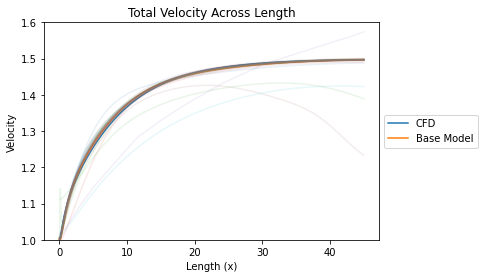

In [7]:
# plt.figure(figsize=(18, 10))
plt.plot(x_cfd[:9*onex*5], np.sqrt(u_cfd[:9*onex*5,25]**2+v_cfd[:9*onex*5,25]**2), label='CFD')
plt.plot(x_base[:9*onex*5], np.sqrt(u_base[:9*onex*5,25]**2+v_base[:9*onex*5,25]**2), label='Base Model')

for i in range(len(location_list)):
    data = sio.loadmat('./' + location_list[i] + '/data_PINN.mat')

    u_data = data['U']
    v_data = data['V']
    p_data = data['P']
    x_data = data['x'][0]
    y_data = data['y'][0]
#     plt.plot(x_data[:9*onex*5], np.sqrt(u_data[:9*onex*5,25]+v_data[:9*onex*5,25]), label=model_list[i], alpha=0.1)
    plt.plot(x_data[:9*onex*5], np.sqrt(u_data[:9*onex*5,25]**2+v_data[:9*onex*5,25]**2), alpha=0.1)
    
plt.title("Total Velocity Across Length")
plt.xlabel("Length (x)")
plt.ylabel("Velocity")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([1, 1.6])
plt.show()

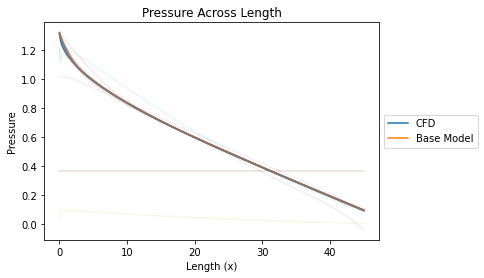

In [8]:
# plt.figure(figsize=(18, 10))
plt.plot(x_cfd[:9*onex*5], p_cfdavg[:9*onex*5], label='CFD')
plt.plot(x_base[:9*onex*5], p_baseavg[:9*onex*5], label='Base Model')

for i in range(len(location_list)):
    data = sio.loadmat('./' + location_list[i] + '/data_PINN.mat')

    u_data = data['U']
    v_data = data['V']
    p_data = data['P']
    x_data = data['x'][0]
    y_data = data['y'][0]
    
    u_avg = u_data[:,:].mean(axis = 1)
    v_avg = v_data[:,:].mean(axis = 1)
    p_avg = p_data[:,:].mean(axis = 1)
    
#     plt.plot(x_data[:9*onex*5], p_data[:9*onex*5,25], label=model_list[i], alpha=0.1)
    plt.plot(x_data[:9*onex*5], p_avg[:9*onex*5], alpha=0.1)

plt.title("Pressure Across Length")
plt.xlabel("Length (x)")
plt.ylabel("Pressure")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [9]:
#subsample every 25 points
p_cfdsample = p_cfdavg[::25]
x_cfdsample = x_data[::25]

p_basesample = p_baseavg[::25]
x_basesample = x_data[::25]

dpdx_cfd = [0.0]*len(x_cfdsample)
dpdx_cfd[0] = (p_cfdsample[0] - p_cfdsample[1])/(x_cfdsample[0] - x_cfdsample[1])
for i in range(1,len(p_cfdsample)-1):
    dpdx_cfd[i] = (p_cfdsample[i+1] - p_cfdsample[i-1])/(x_cfdsample[i+1]-x_cfdsample[i-1])
dpdx_cfd[-1] = (p_cfdsample[-1] - p_cfdsample[-2])/(x_cfdsample[-1] - x_cfdsample[-2])

dpdx_base = [0.0]*len(x_basesample)
dpdx_base[0] = (p_basesample[0] - p_basesample[1])/(x_basesample[0] - x_basesample[1])
for i in range(1,len(p_basesample)-1):
    dpdx_base[i] = (p_basesample[i+1] - p_basesample[i-1])/(x_basesample[i+1]-x_basesample[i-1])
dpdx_base[-1] = (p_basesample[-1] - p_basesample[-2])/(x_basesample[-1] - x_basesample[-2])

dp2d2x_cfd = [0.0]*len(x_cfdsample)
dp2d2x_cfd[0] = (dpdx_cfd[0] - dpdx_cfd[1])/(x_cfdsample[0] - x_cfdsample[1])
for i in range(1,len(dpdx_cfd)-1):
    dp2d2x_cfd[i] = (dpdx_cfd[i+1] - dpdx_cfd[i-1])/(x_cfdsample[i+1]-x_cfdsample[i-1])
dp2d2x_cfd[-1] = (dpdx_cfd[-1] - dpdx_cfd[-2])/(x_cfdsample[-1] - x_cfdsample[-2])

dp2d2x_base = [0.0]*len(x_basesample)
dp2d2x_base[0] = (dpdx_base[0] - dpdx_base[1])/(x_basesample[0] - x_basesample[1])
for i in range(1,len(dpdx_base)-1):
    dp2d2x_base[i] = (dpdx_base[i+1] - dpdx_base[i-1])/(x_basesample[i+1]-x_basesample[i-1])
dp2d2x_base[-1] = (dpdx_base[-1] - dpdx_base[-2])/(x_basesample[-1] - x_basesample[-2])

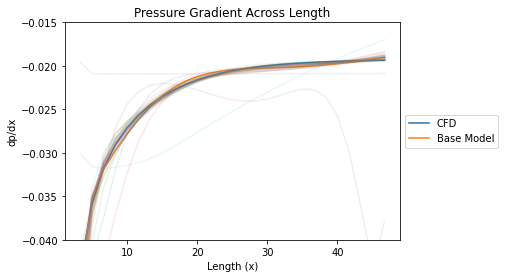

In [10]:
# plt.figure(figsize=(18, 10))
plt.plot(x_cfdsample[2:-1], dpdx_cfd[2:-1], label='CFD')
plt.plot(x_basesample[2:-1], dpdx_base[2:-1], label='Base Model')

for i in range(len(location_list)):
    data = sio.loadmat('./' + location_list[i] + '/data_PINN.mat')

    u_data = data['U']
    v_data = data['V']
    p_data = data['P']
    x_data = data['x'][0]
    y_data = data['y'][0]
    
    u_avg = u_data[:,:].mean(axis = 1)
    v_avg = v_data[:,:].mean(axis = 1)
    p_avg = p_data[:,:].mean(axis = 1)
    
    #subsample every 25 points
    p_sample = p_avg[::25]
    x_sample = x_data[::25]

    dpdx = [0.0]*len(x_sample)
    dpdx[0] = (p_sample[0] - p_sample[1])/(x_sample[0] - x_sample[1])
    for i in range(1,len(p_sample)-1):
        dpdx[i] = (p_sample[i+1] - p_sample[i-1])/(x_sample[i+1]-x_sample[i-1])
    dpdx[-1] = (p_sample[-1] - p_sample[-2])/(x_sample[-1] - x_sample[-2])
    
#     plt.plot(x_data[1*onex*5:9*onex*5], dpdx, label=model_list[i], alpha=0.1)
    plt.plot(x_sample[2:-1], dpdx[2:-1], alpha=0.1)

plt.title("Pressure Gradient Across Length")
plt.xlabel("Length (x)")
plt.ylabel("dp/dx")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([-0.04, -0.015])
plt.show()

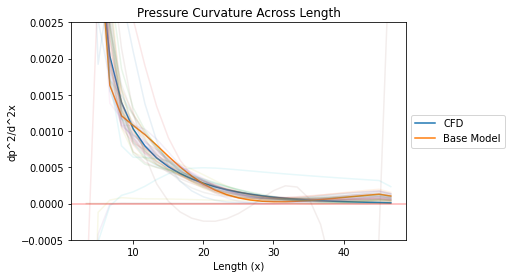

In [11]:
# plt.figure(figsize=(18, 10))
plt.plot(x_cfdsample[2:-1], dp2d2x_cfd[2:-1], label='CFD')
plt.plot(x_basesample[2:-1], dp2d2x_base[2:-1], label='Base Model')

for i in range(len(location_list)):
    data = sio.loadmat('./' + location_list[i] + '/data_PINN.mat')

    u_data = data['U']
    v_data = data['V']
    p_data = data['P']
    x_data = data['x'][0]
    y_data = data['y'][0]
    
    u_avg = u_data[:,:].mean(axis = 1)
    v_avg = v_data[:,:].mean(axis = 1)
    p_avg = p_data[:,:].mean(axis = 1)
    
    #subsample every 25 points
    p_sample = p_avg[::25]
    x_sample = x_data[::25]

    dpdx = [0.0]*len(x_sample)
    dpdx[0] = (p_sample[0] - p_sample[1])/(x_sample[0] - x_sample[1])
    for i in range(1,len(p_sample)-1):
        dpdx[i] = (p_sample[i+1] - p_sample[i-1])/(x_sample[i+1]-x_sample[i-1])
    dpdx[-1] = (p_sample[-1] - p_sample[-2])/(x_sample[-1] - x_sample[-2])
    
    dp2d2x = [0.0]*len(x_sample)
    dp2d2x[0] = (dpdx[0] - dpdx[1])/(x_sample[0] - x_sample[1])
    for i in range(1,len(dpdx)-1):
        dp2d2x[i] = (dpdx[i+1] - dpdx[i-1])/(x_sample[i+1]-x_sample[i-1])
    dp2d2x[-1] = (dpdx[-1] - dpdx[-2])/(x_sample[-1] - x_sample[-2])
    
#     plt.plot(x_data[1*onex*5:9*onex*5], dpdx, label=model_list[i], alpha=0.1)
    plt.plot(x_sample[2:-1], dp2d2x[2:-1], alpha=0.1)

plt.title("Pressure Curvature Across Length")
plt.xlabel("Length (x)")
plt.ylabel("dp^2/d^2x")
plt.axhline(0, color="red", alpha=0.3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim([-0.0005, 0.0025])
plt.show()